<a href="https://colab.research.google.com/github/simmihacks/chatgpt-email-generation/blob/main/maze_sen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No solution found.


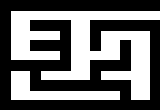

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import Image as DisplayImage
from google.colab import files

def main():
  file_path = '/content/drive/MyDrive/Colab Notebooks/Maze_Module3/maze_impossible.txt'

  maze = read_maze(file_path)
  start_row, start_col = None, None

  #Find start position in maze
  for i, row in enumerate(maze):
    for j, val in enumerate(row):
      if val == 'S':
        start_row, start_col = i,j
        break
    if start_row is not None:
      break
  draw_maze(maze)

  # Ensure start position was found before attempting to solve
  if start_row is None or start_col is None:
      print("Start position 'S' not found in the maze.")
  else:
      if solveFrom(maze, start_row, start_col):
          print("Maze solved!")
          draw_maze(maze)
      else:
          print("No solution found.")

  display(DisplayImage(filename='maze_solution.png'))




#Read file into memory
def read_maze(file_path):
    with open(file_path, 'r') as file:
        maze = [list(line.strip()) for line in file]
    return maze


def solveFrom(maze, rowPos, colPos):
    if rowPos < 0 or colPos < 0 or rowPos >= len(maze) or colPos >= len(maze[0]):
        return False
    if maze[rowPos][colPos] == 'F':
        return True
    if maze[rowPos][colPos] in ['#', '+']:
        return False

    # Mark the current spot as visited
    maze[rowPos][colPos] = '+'

    # Neighbors: down, right, up, left
    if (solveFrom(maze, rowPos+1, colPos) or
        solveFrom(maze, rowPos, colPos+1) or
        solveFrom(maze, rowPos-1, colPos) or
        solveFrom(maze, rowPos, colPos-1)):
        return True

    # For backtracking if dead end
    maze[rowPos][colPos] = ' '
    return False


from PIL import Image, ImageDraw
#this draws the maze
def draw_maze(maze):
  height = len(maze)
  width = len(maze[0])

  im = Image.new('RGB', (width*10, height*10), (255,255,255))
  draw = ImageDraw.Draw(im)

  for i, row in enumerate(maze):
    for j, val in enumerate(row):
      if val == '#':
        draw.rectangle([j*10, i*10, (j+1)*10, (i+1)*10], fill = 'black')
      if val == '+':
        draw.rectangle([j*10, i*10, (j+1)*10, (i+1)*10], fill='green')

  im.save('maze_solution.png')

if __name__ == "__main__":
    main()
